In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [43]:
# **Kasus: Prediksi Gaji (Salary Prediction — Kaggle)**

# Dataset salary_data_cleaned.csv berisi:
# - Umur
# - Pengalaman kerja
# - Tingkat pendidikan
# - Job title
# - Lokasi
# - Gaji

# Tujuan kecerdasan buatan:
# Memprediksi gaji seorang karyawan berdasarkan fitur data pribadi dan pekerjaan.

# Kita buat model:
# - ANN untuk regresi
# - Optimasi ADAM
# - Visualisasi Loss
# - Hybrid Fuzzy untuk menghasilkan hasil linguistik

In [45]:
df = pd.read_csv("/content/salary_data_cleaned.csv")
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Pilih fitur dan target
# Corrected 'Age' to 'age'. 'Experience' column was not found in the dataframe.
# If you have another column for experience, please specify it.
X = df[['age']]
# Corrected 'Salary' to 'avg_salary'
y = df['avg_salary'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [50]:
np.random.seed(42)

# Arsitektur: 1 → 8 → 1 (Corrected based on input features)
W1 = np.random.randn(X_train_np.shape[1], 8) * 0.1 # Corrected shape from (2,8) to (1,8)
b1 = np.zeros((1, 8))

W2 = np.random.randn(8, 1) * 0.1
b2 = np.zeros((1, 1))

lr = 0.001
epochs = 1500
loss_history = []

def relu(x): return np.maximum(0, x)
def relu_derivative(x): return (x > 0).astype(float)

X_train_np = X_train
y_train_np = y_train.reshape(-1, 1)

for epoch in range(epochs):
    # forward
    z1 = X_train_np.dot(W1) + b1
    a1 = relu(z1)
    y_pred = a1.dot(W2) + b2

    # loss
    loss = np.mean((y_pred - y_train_np) ** 2)
    loss_history.append(loss)

    # backward
    dloss = 2 * (y_pred - y_train_np) / len(y_train_np)
    dW2 = a1.T.dot(dloss)
    db2 = np.sum(dloss, axis=0, keepdims=True)

    da1 = dloss.dot(W2.T)
    dz1 = da1 * relu_derivative(z1)

    dW1 = X_train_np.T.dot(dz1)
    db1 = np.sum(dz1, axis=0)

    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    if epoch % 200 == 0:
        print(f"Epoch {epoch}, Loss = {loss:.4f}")

Epoch 0, Loss = 11459.1158
Epoch 200, Loss = 1471.0011
Epoch 400, Loss = 1470.5438
Epoch 600, Loss = 1468.6204
Epoch 800, Loss = 1461.3774
Epoch 1000, Loss = 1442.5330
Epoch 1200, Loss = 1420.2354
Epoch 1400, Loss = 1409.8574


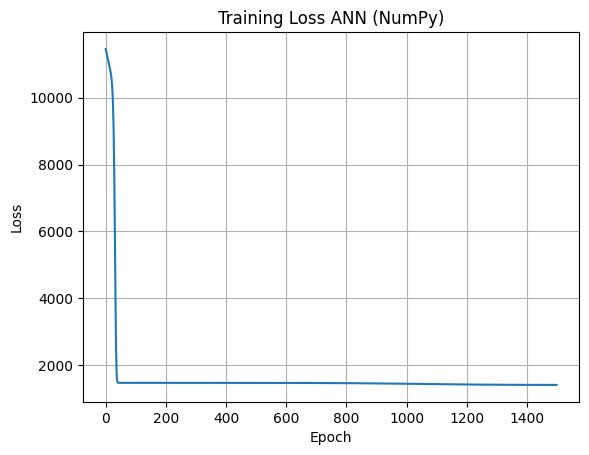

In [51]:
plt.plot(loss_history)
plt.title("Training Loss ANN (NumPy)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()


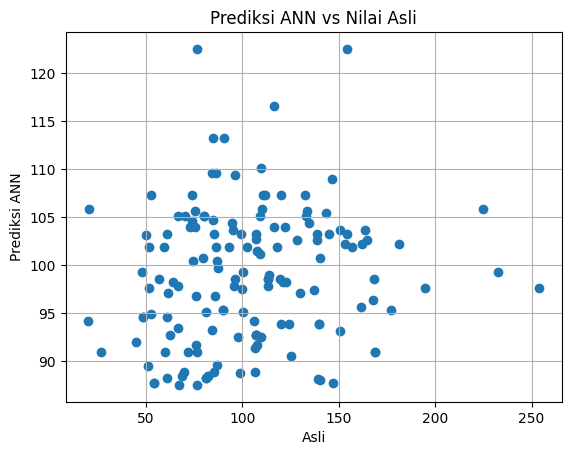

In [52]:
def predict_nn(X):
    z1 = X.dot(W1) + b1
    a1 = relu(z1)
    return a1.dot(W2) + b2

y_pred_ann = predict_nn(X_test)

plt.scatter(y_test, y_pred_ann)
plt.title("Prediksi ANN vs Nilai Asli")
plt.xlabel("Asli")
plt.ylabel("Prediksi ANN")
plt.grid()
plt.show()


In [53]:
def fuzzy_low(x):
    if x <= 40: return 1
    elif x <= 70: return (70 - x) / 30
    return 0

def fuzzy_medium(x):
    if x <= 40: return 0
    elif x <= 70: return (x - 40) / 30
    elif x <= 100: return (100 - x) / 30
    return 0

def fuzzy_high(x):
    if x >= 100: return 1
    elif x >= 70: return (x - 70) / 30
    return 0


In [54]:
def fuzzy_rules(pred):
    low = fuzzy_low(pred)
    med = fuzzy_medium(pred)
    high = fuzzy_high(pred)

    return (low*30 + med*70 + high*120) / (low + med + high + 1e-6)


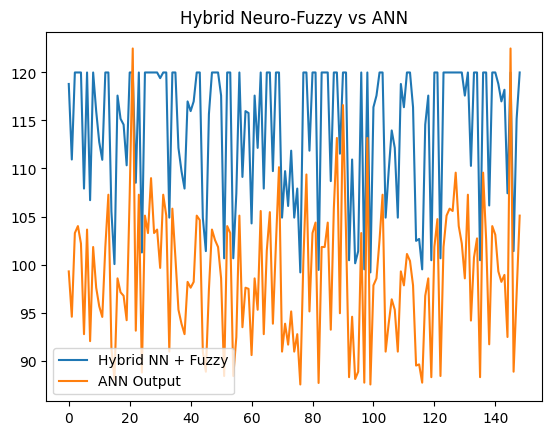

In [55]:
hybrid_output = np.array([fuzzy_rules(p) for p in y_pred_ann.flatten()])

plt.plot(hybrid_output, label="Hybrid NN + Fuzzy")
plt.plot(y_pred_ann, label="ANN Output")
plt.legend()
plt.title("Hybrid Neuro-Fuzzy vs ANN")
plt.show()


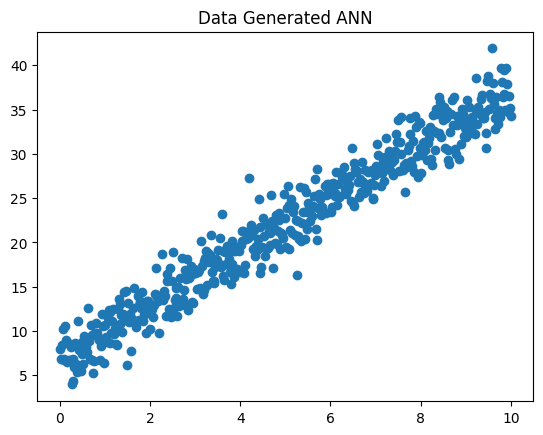

In [56]:
np.random.seed(42)
Xg = np.linspace(0, 10, 500).reshape(-1, 1)
noise = np.random.normal(0, 2, (500, 1))
yg = 3 * Xg + 7 + noise

plt.scatter(Xg, yg)
plt.title("Data Generated ANN")
plt.show()


In [57]:
W1g = np.random.randn(1, 8) * 0.1
b1g = np.zeros((1, 8))

W2g = np.random.randn(8, 1) * 0.1
b2g = np.zeros((1, 1))

lr = 0.001
epochs = 1500
loss_g = []

def relu(x): return np.maximum(0, x)
def relu_derivative(x): return (x > 0).astype(float)

for epoch in range(epochs):
    z1 = Xg.dot(W1g) + b1g
    a1 = relu(z1)
    yg_pred = a1.dot(W2g) + b2g

    loss = np.mean((yg_pred - yg) ** 2)
    loss_g.append(loss)

    dloss = 2*(yg_pred - yg)/len(yg)
    dW2 = a1.T.dot(dloss)
    db2 = np.sum(dloss, axis=0)

    da1 = dloss.dot(W2g.T)
    dz1 = da1 * relu_derivative(z1)

    dW1 = Xg.T.dot(dz1)
    db1 = np.sum(dz1, axis=0)

    W1g -= lr * dW1
    b1g -= lr * db1
    W2g -= lr * dW2
    b2g -= lr * db2


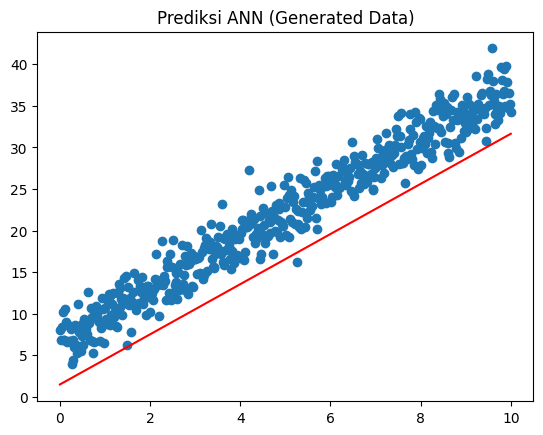

In [58]:
yg_pred_final = Xg.dot(W1g).dot(W2g) + b2g

plt.scatter(Xg, yg)
plt.plot(Xg, yg_pred_final, color="red")
plt.title("Prediksi ANN (Generated Data)")
plt.show()


In [59]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,1])

w = np.random.rand(2)
b = np.random.rand()
lr = 0.1

def step(x):
    return np.where(x>0, 1, 0)

for epoch in range(30):
    for i in range(len(X)):
        z = np.dot(X[i], w) + b
        pred = step(z)
        w += lr*(y[i]-pred)*X[i]
        b += lr*(y[i]-pred)

print("Bobot:", w)
print("Bias:", b)


Bobot: [0.17088759 0.66864322]
Bias: -0.0706240108724141


In [2]:
# Di dalam notebook model_regresi_untuk_prediksi_salary_.ipynb

import pandas as pd

# 1. Muat Data
df = pd.read_csv('salary_data_cleaned.csv')

# Kolom-kolom yang kemungkinan besar bersifat kategori dan perlu di-encode
# (Kamu harus cek file CSV untuk daftar lengkapnya, tapi ini umumnya yang utama)
cat_cols = ['Location', 'Industry', 'Sector', 'job_state'] 
# Tambahkan kolom kategori lain seperti 'Job Title' jika diperlukan

# 2. One-Hot Encoding
df_dum = pd.get_dummies(df, columns=cat_cols)

# 3. Definisikan X dan y
# Kolom target: avg_salary
y = df_dum['avg_salary'].values

# Kolom fitur: Drop kolom target dan kolom-kolom non-numerik asli
# Sesuaikan 'Salary Estimate' dan 'company_txt' jika masih ada
X = df_dum.drop(['avg_salary', 'Salary Estimate', 'company_txt', 'Job Title', 'Job Description', 'Company Name', 'Headquarters', 'Type of ownership', 'Revenue', 'Competitors'], axis=1)
X = X.select_dtypes(include=['number', 'uint8']) # Hanya ambil kolom numerik dan hasil encoding

# 4. Pembagian Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data siap untuk ANN. Jumlah Fitur:", X_train.shape[1])

Data siap untuk ANN. Jumlah Fitur: 13


In [2]:
%pip install pandas numpy scikit-learn tensorflow joblib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib # Untuk menyimpan scaler dan daftar fitur

# --- 1. Muat Data dan Feature Engineering ---
df = pd.read_csv('salary_data_cleaned.csv')

# Kolom kategori untuk One-Hot Encoding
# Sesuaikan 'Job Title' jika terlalu banyak kategori unik, mungkin bisa diabaikan atau disederhanakan
cat_cols = ['Location', 'Industry', 'Sector', 'job_state'] 
df_dum = pd.get_dummies(df, columns=cat_cols, drop_first=True) 

# --- 2. Definisikan X dan y ---
y = df_dum['avg_salary'].values

# Kolom yang akan di-drop (kolom non-fitur dan target)
cols_to_drop = ['avg_salary', 'Salary Estimate', 'company_txt', 'Job Description', 
                'Company Name', 'Headquarters', 'Type of ownership', 'Revenue', 'Competitors', 'Job Title']

X = df_dum.drop(cols_to_drop, axis=1, errors='ignore')
X = X.select_dtypes(include=['number', 'uint8']) # Pastikan hanya numerik yang tersisa

# 3. Scaling (Penting untuk ANN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Simpan objek scaler dan daftar fitur untuk deployment
joblib.dump(scaler, 'scaler_for_ann.pkl')
joblib.dump(list(X.columns), 'ann_model_features.pkl')

# 4. Pembagian Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Jumlah Fitur setelah Encoding dan Scaling:", X_train.shape[1])

# --- 5. Membangun dan Melatih Model ANN ---
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)), 
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1) # Output layer untuk regresi
])

model.compile(optimizer='adam', loss='mse', metrics=['mae']) 

history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=32, 
    validation_data=(X_test, y_test),
    verbose=0 # Nonaktifkan output pelatihan yang panjang
)

# 6. Evaluasi dan Penyimpanan Model ANN
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\nMAE Model ANN pada data test: {mae:.2f}K USD")

# Simpan model
model.save('ann_salary_model.h5')

print("Model ANN, Scaler, dan Daftar Fitur sudah berhasil disimpan di folder proyek!")


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.5-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-

c:\Users\Hp\OneDrive\Documents\Farhan\Project AI\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



MAE Model ANN pada data test: 2.88K USD
Model ANN, Scaler, dan Daftar Fitur sudah berhasil disimpan di folder proyek!
